In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
seed = 42

# Finger Classification Data

100 samples of 6 gestures were recorded with the Myo in a position which imitated Sosins.
The positions of each sensor were marked onto the hand using marker pen and then the sensors were all rotated by 22.5° to the midpoints between the sensors in the previous experiment and another 100 data points were gathered. 



In [2]:
path = "../../data/FingerClassification/"
path1 = path+"MidForearm/"

In [3]:
rest  = np.fromfile(path1+"vals0.dat", dtype=np.uint16).reshape((-1, 8))
thumb  = np.fromfile(path1+"vals1.dat", dtype=np.uint16).reshape((-1, 8))
index  = np.fromfile(path1+"vals2.dat", dtype=np.uint16).reshape((-1, 8))
middle = np.fromfile(path1+"vals3.dat", dtype=np.uint16).reshape((-1, 8))
ring   = np.fromfile(path1+"vals4.dat", dtype=np.uint16).reshape((-1, 8))
pinky  = np.fromfile(path1+"vals5.dat", dtype=np.uint16).reshape((-1, 8))
thumb_up = np.fromfile(path1+"vals6.dat", dtype=np.uint16).reshape((-1, 8))
data = [rest, thumb, index, middle, ring, pinky, thumb_up]
label_cols = ['rest', 'thumb_in', 'index', 'middle', 'ring', 'pinky', 'thumb_up']

In [4]:
for i in range(len(data)):
    print(label_cols[i], data[i].shape[0])

rest 102
thumb_in 105
index 108
middle 106
ring 112
pinky 106
thumb_up 101


## Adding a labels column

In [5]:
labelled_data = []
for i in range(len(data)):
    a = data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_data.append(b)
    
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
df = pd.DataFrame(np.vstack(labelled_data), columns=cols)
# Replacing numerical fingernames with str
df['Finger'] = df['Finger'].apply(lambda x: label_cols[x])


In [6]:
df.head()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Finger
0,22,49,145,127,56,30,20,22,rest
1,23,47,140,126,52,31,19,22,rest
2,23,44,130,129,61,32,21,22,rest
3,24,40,128,115,60,28,20,22,rest
4,25,40,128,107,60,27,20,23,rest


In [7]:
#air_df.to_csv('air_df.csv',index=False)

In [8]:
df.var()

Ch1    53279.113674
Ch2    38015.951642
Ch3    31698.234363
Ch4     7495.773719
Ch5     4279.433338
Ch6    20708.948257
Ch7    72954.577148
Ch8    40719.640676
dtype: float64

[Text(0.5, 1.0, 'sEMG and Finger corrolations')]

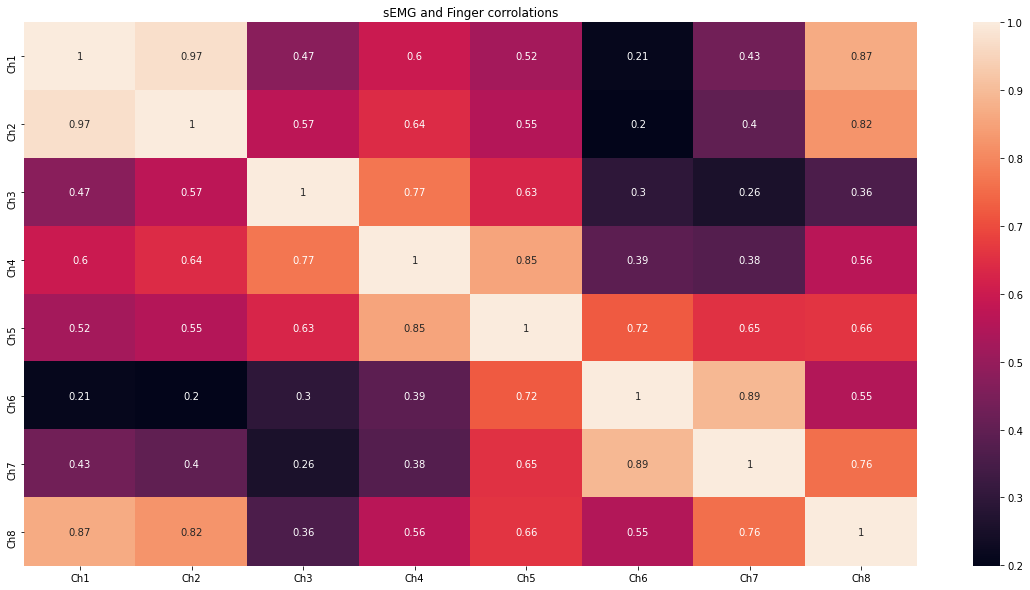

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Finger corrolations")

array([[<AxesSubplot:title={'center':'Ch1'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch2'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch3'}, xlabel='[Finger]'>],
       [<AxesSubplot:title={'center':'Ch4'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch5'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch6'}, xlabel='[Finger]'>],
       [<AxesSubplot:title={'center':'Ch7'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch8'}, xlabel='[Finger]'>,
        <AxesSubplot:>]], dtype=object)

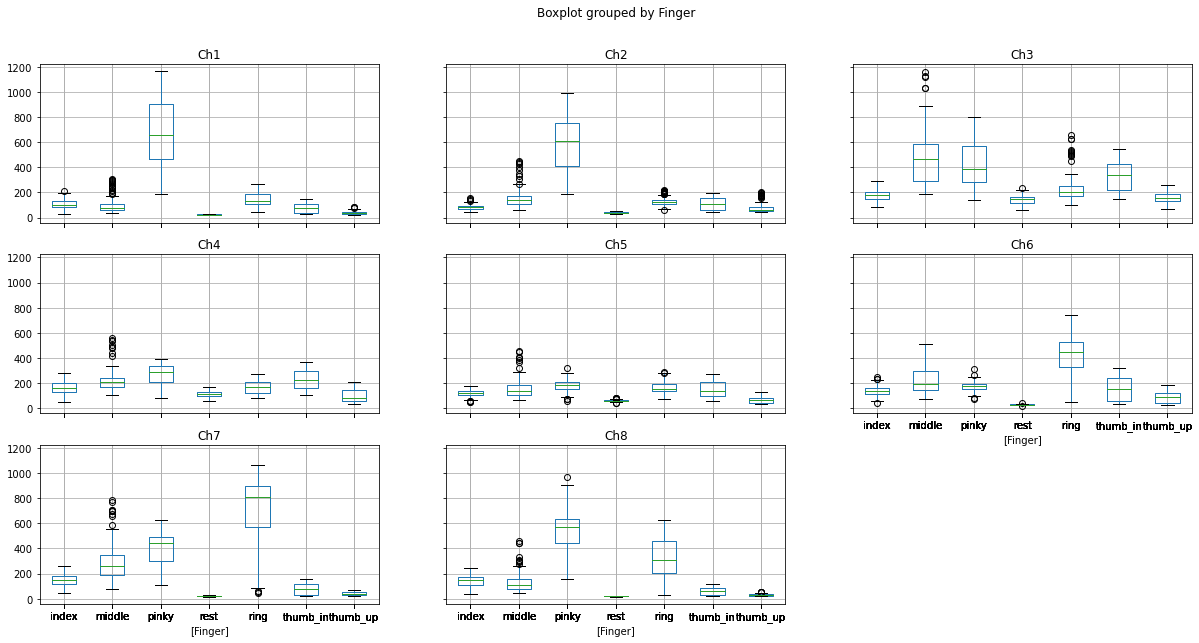

In [10]:
df.boxplot(by='Finger')

<AxesSubplot:title={'center':'Ch2'}, xlabel='[Finger]'>

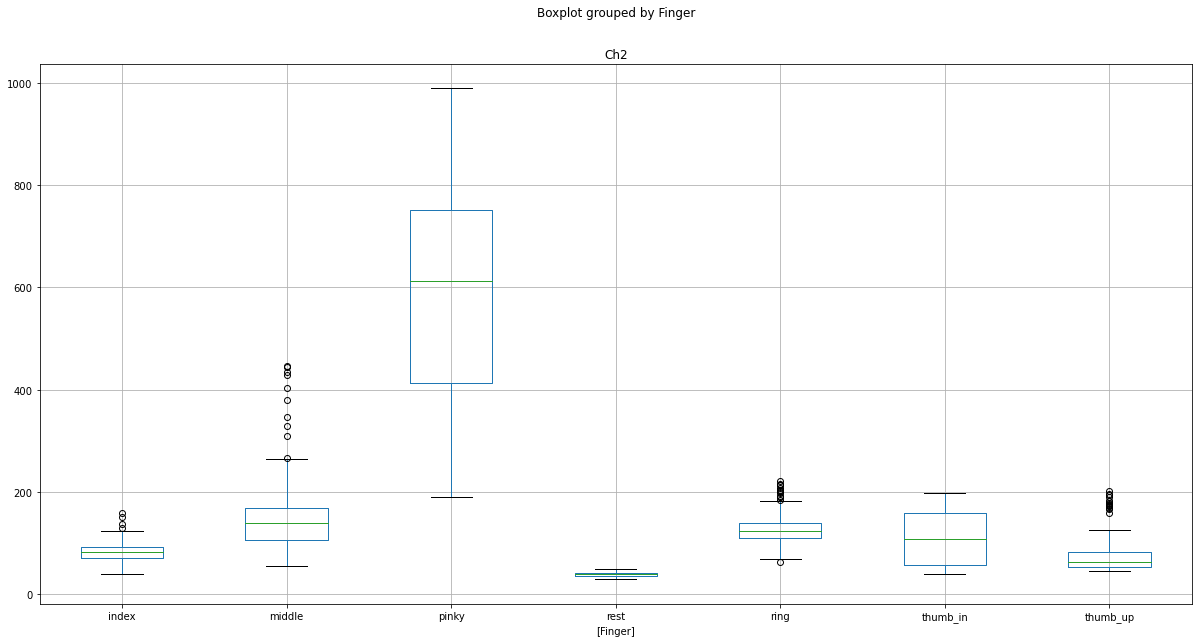

In [11]:
df[['Ch2', 'Finger']].boxplot(by='Finger')

In [12]:
df.groupby('Finger').mean()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8
Finger,,,,,,,,
index,105.416667,83.648148,176.898148,164.583333,119.712963,135.037037,150.120370,142.916667
middle,103.433962,158.688679,489.396226,226.198113,159.575472,217.122642,298.481132,133.547170
pinky,664.915094,587.330189,420.584906,273.245283,179.094340,169.726415,407.971698,545.896226
rest,22.970588,38.970588,139.323529,112.235294,59.637255,27.852941,21.245098,20.441176
ring,143.696429,128.625000,236.946429,170.348214,165.705357,422.758929,728.116071,329.339286
thumb_in,75.914286,113.228571,329.133333,227.980952,148.904762,157.885714,78.247619,59.685714
thumb_up,40.178218,80.326733,155.792079,96.940594,63.762376,83.722772,39.108911,30.455446


<AxesSubplot:>

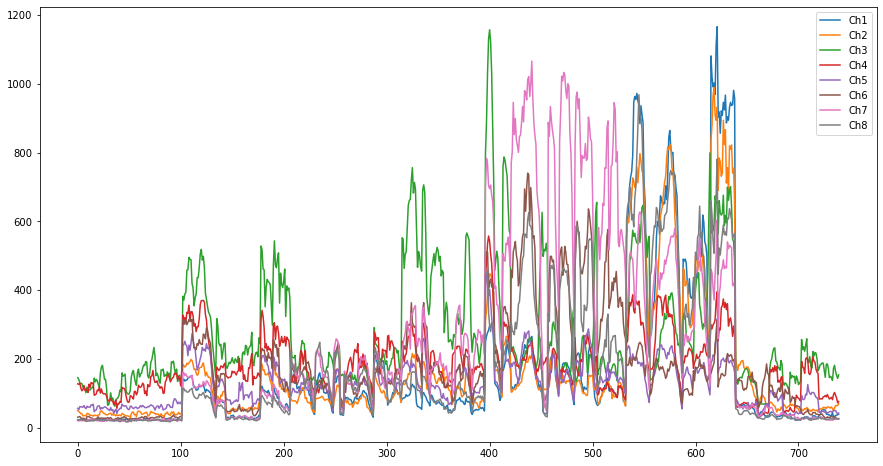

In [13]:
import matplotlib

matplotlib.rc('figure', figsize=(15, 8))

df.plot(figsize=(15, 8))

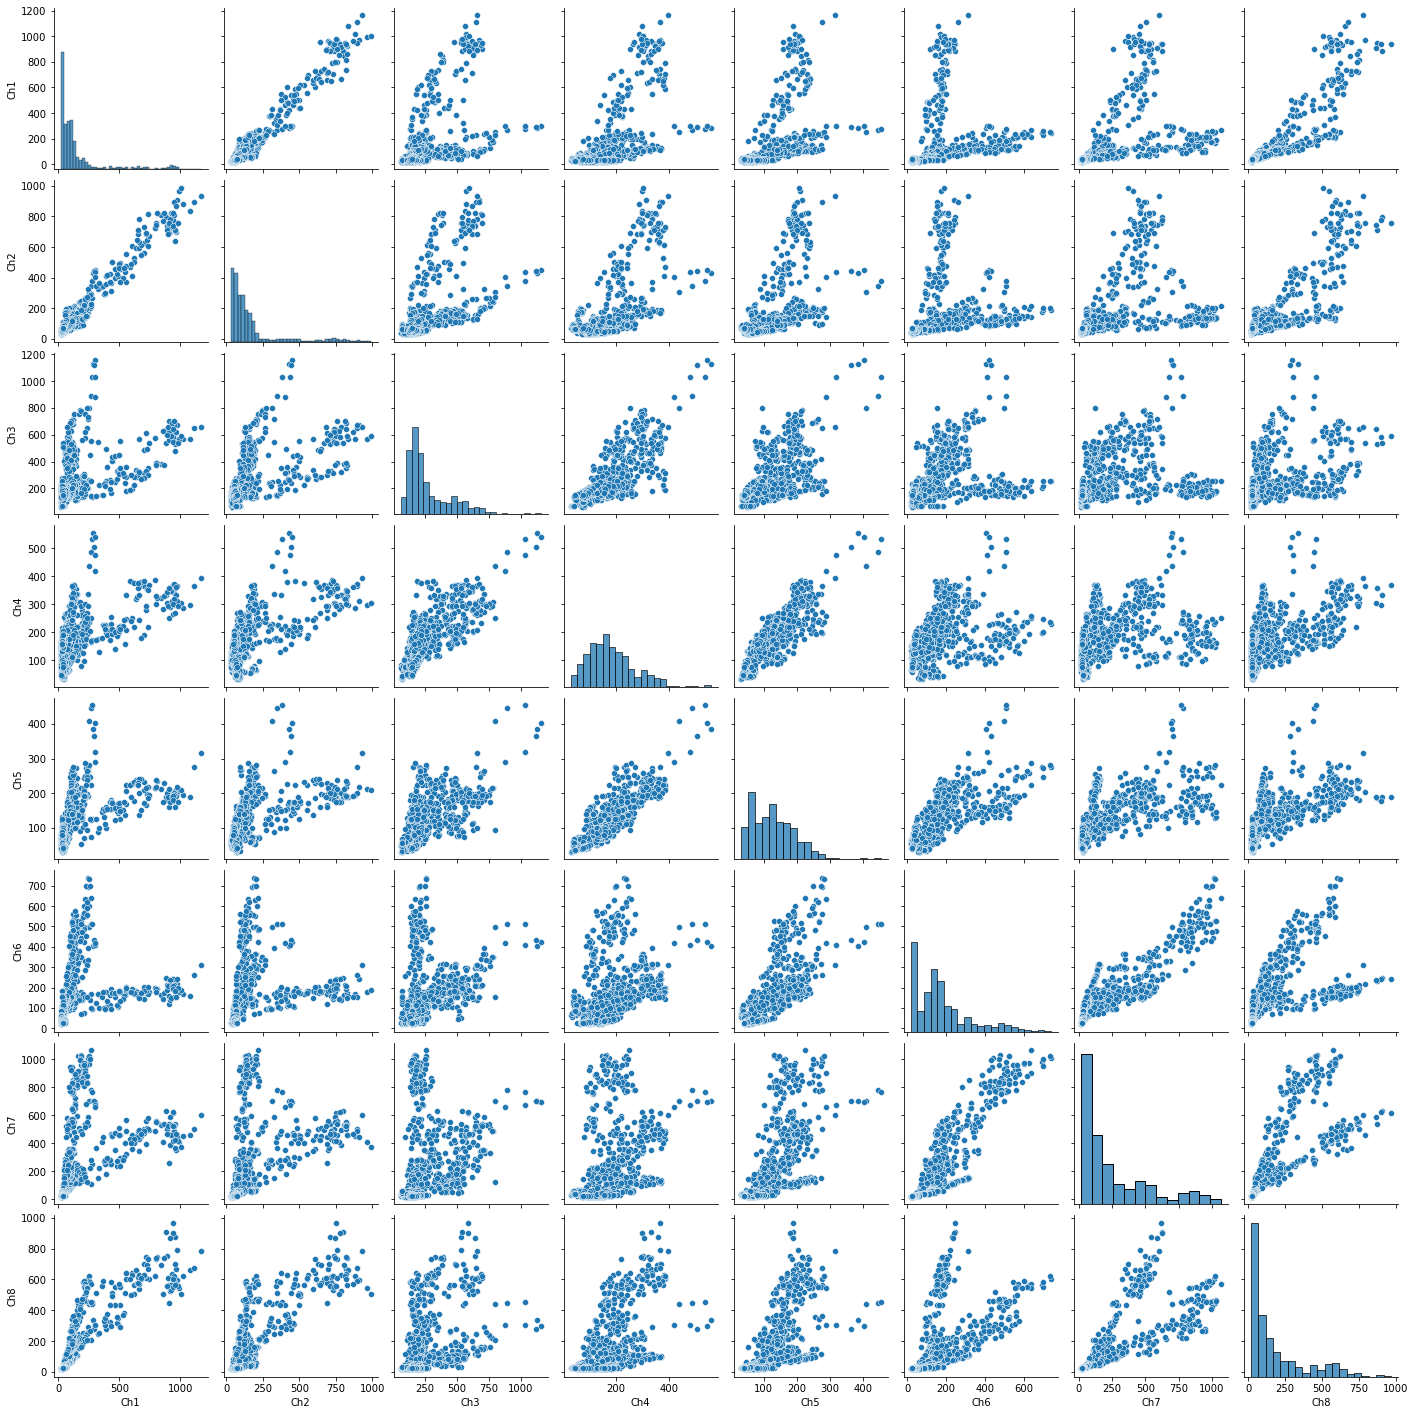

In [14]:
sns.pairplot(df)

## PCA

In [15]:
from sklearn import decomposition

X = df.drop(['Finger'],1).values
X.shape

(740, 8)

In [16]:
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.65443375 0.21825556 0.0971648  0.01351906 0.00748171 0.00540503
 0.00279707 0.00094301]


In [17]:
X.shape

(740, 8)

In [18]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xp = pca.transform(X)

print(pca.explained_variance_ratio_)

[0.65443375 0.21825556]


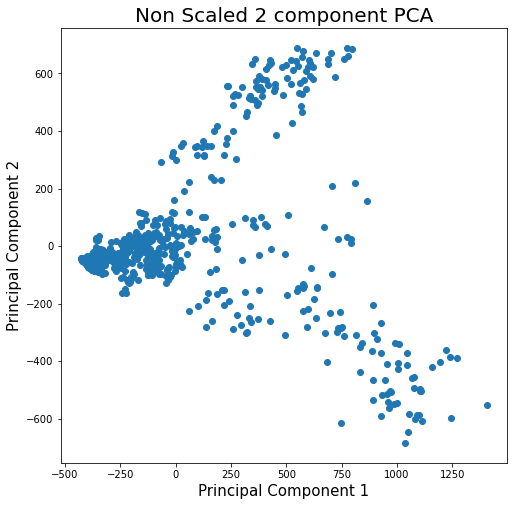

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Non Scaled 2 component PCA', fontsize = 20)
ax.scatter(Xp[:,0], Xp[:,1])

In [20]:
plt.cm.nipy_spectral(5)

(0.18301960784313726, 0.0, 0.20913725490196078, 1.0)

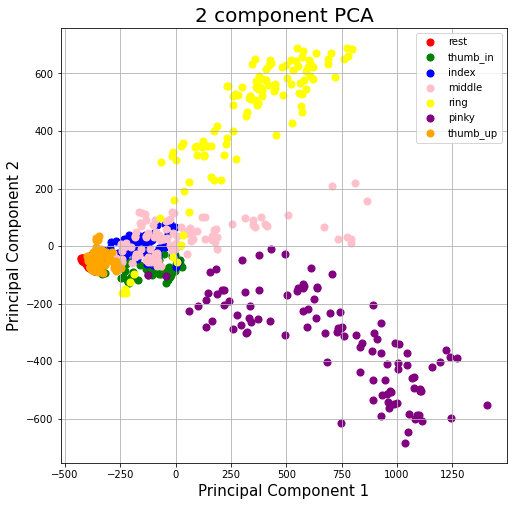

In [21]:
principalDf = pd.DataFrame(data = Xp
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Finger']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = label_cols
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Finger'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[0.63131197 0.18114747]


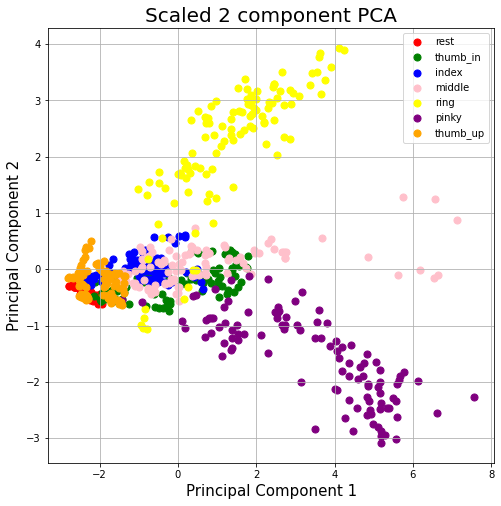

In [22]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
X = df.drop(['Finger'],1).values
# Separating out the target
y = df['Finger'].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Finger']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Scaled 2 component PCA', fontsize = 20)
targets = label_cols
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Finger'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

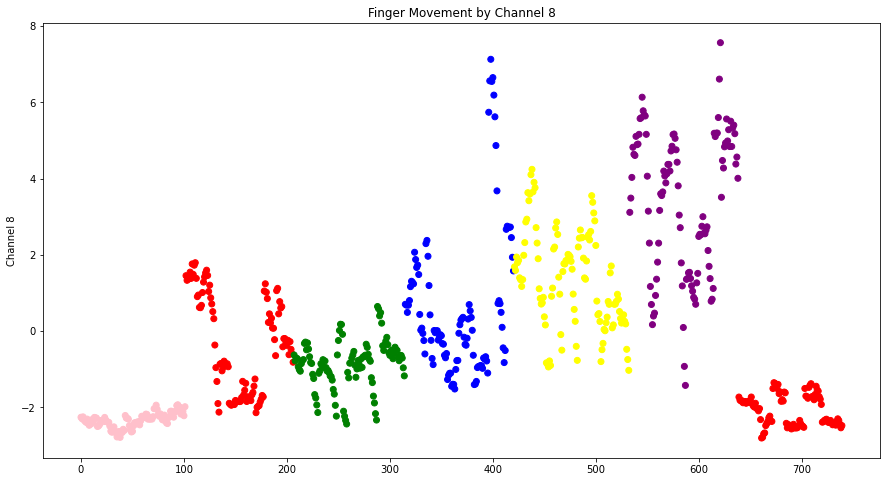

In [23]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'red'}
ax.scatter(df.index, principalDf['principal component 1'], c=df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 8")
ax.set_ylabel("Channel 8")
plt.show()

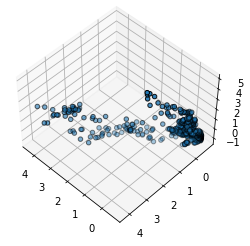

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y = df.Finger

ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

## LDA

Mean Accuracy: 0.805 (0.044)


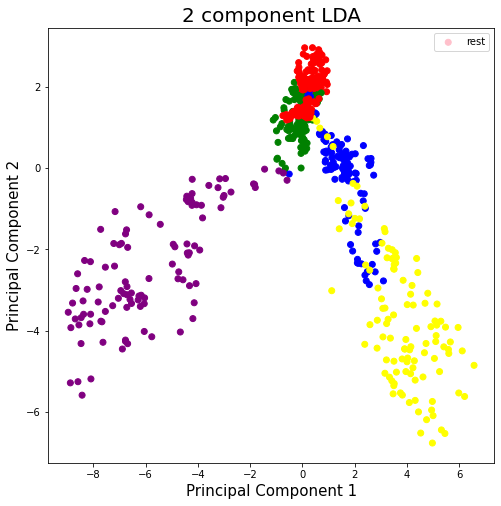

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

X = df.drop(['Finger'], 1)
y = df.Finger

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

Xl = clf.transform(X)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
ax.scatter(Xl[:,0], Xl[:,1], c=df['Finger'].map(colors))
ax.legend(label_cols)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

## PCA LDA

Mean Accuracy: 0.805 (0.044)


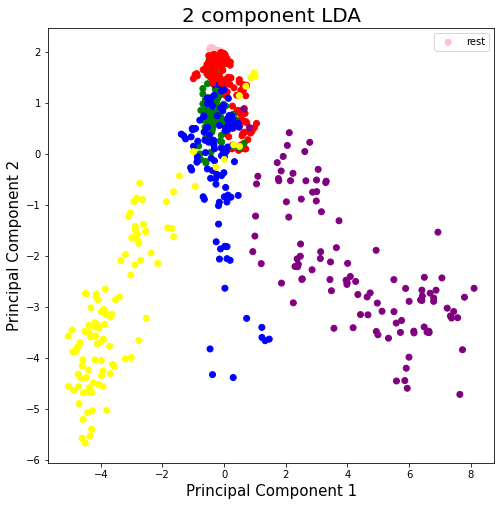

In [26]:
clf = LinearDiscriminantAnalysis()
clf.fit(Xp, y)

Xl = clf.transform(Xp)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
ax.scatter(Xl[:,0], Xl[:,1], c=df['Finger'].map(colors))
ax.legend(label_cols)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# XGBoost

In order to stop our classifier predicting the most common class with higher probability, we will select the first 100 samples from each class. Then a random seeded selection of 67 samples will be used as training data to predict the other 33 samples.
When train and test splits are made, we stratify the data to ensure there is no class imbalance.

In [27]:
rest  = np.fromfile(path1+"vals0.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
thumb  = np.fromfile(path1+"vals1.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
index  = np.fromfile(path1+"vals2.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
middle = np.fromfile(path1+"vals3.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
ring   = np.fromfile(path1+"vals4.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
pinky  = np.fromfile(path1+"vals5.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
thumb_up = np.fromfile(path1+"vals6.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
data = [rest, thumb, index, middle, ring, pinky, thumb_up]
label_cols = ['rest', 'thumb_in', 'index', 'middle', 'ring', 'pinky', 'thumb_up']

In [28]:
# Add labels
labelled_data = []
for i in range(len(data)):
    a = data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_data.append(b)
    
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
df100 = pd.DataFrame(np.vstack(labelled_data), columns=cols)
# Replacing numerical fingernames with str
df100['Finger'] = df100['Finger'].apply(lambda x: label_cols[x])

In [29]:
df100.to_csv(path1+'Labelled100.csv',index=False)

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df100.drop(['Finger'],1).values
Y = df100.Finger

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, stratify=Y)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

y_pred
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.81%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

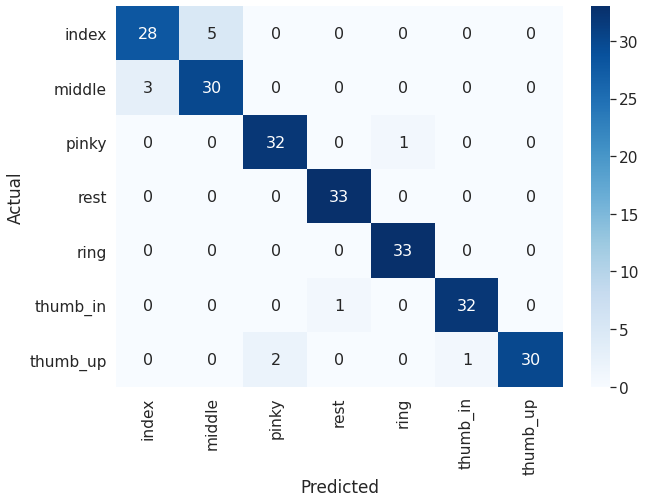

In [31]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

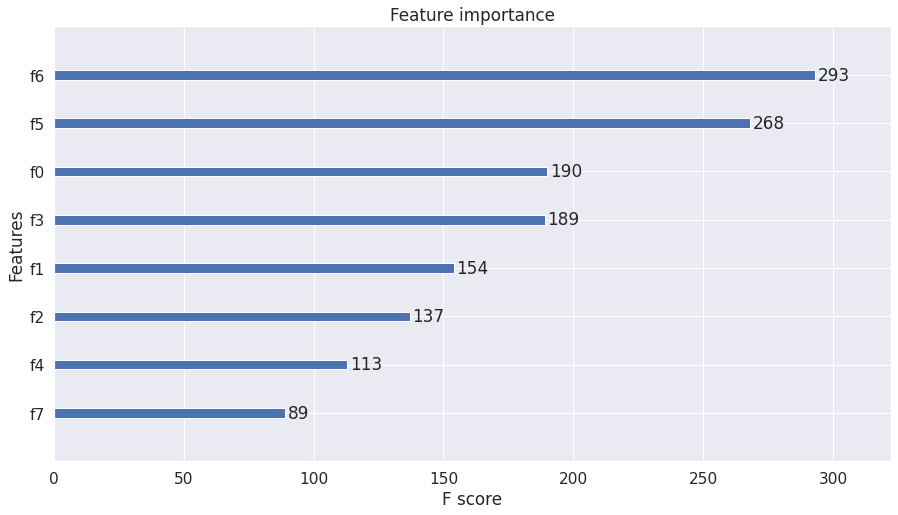

In [32]:
from xgboost import plot_importance

# plot
plot_importance(model)

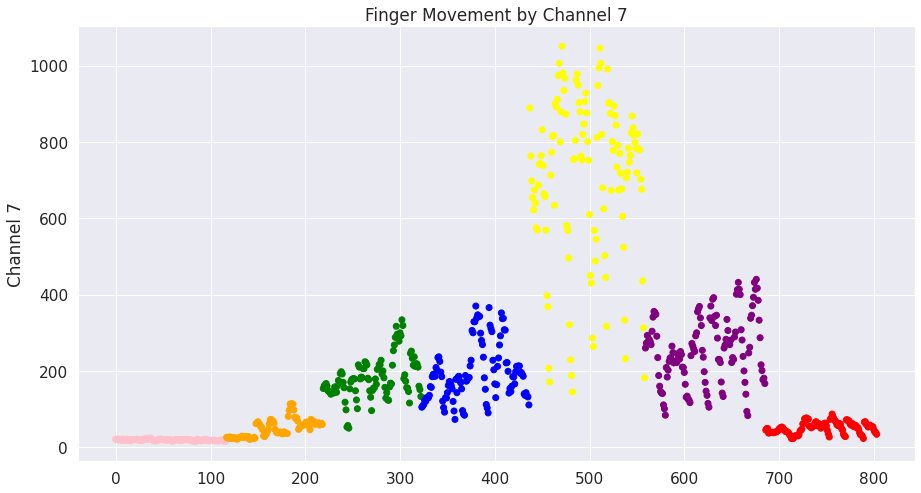

In [33]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'orange'}
ax.scatter(df.index, df['Ch7'], c=df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 7")
ax.set_ylabel("Channel 7")
plt.show()

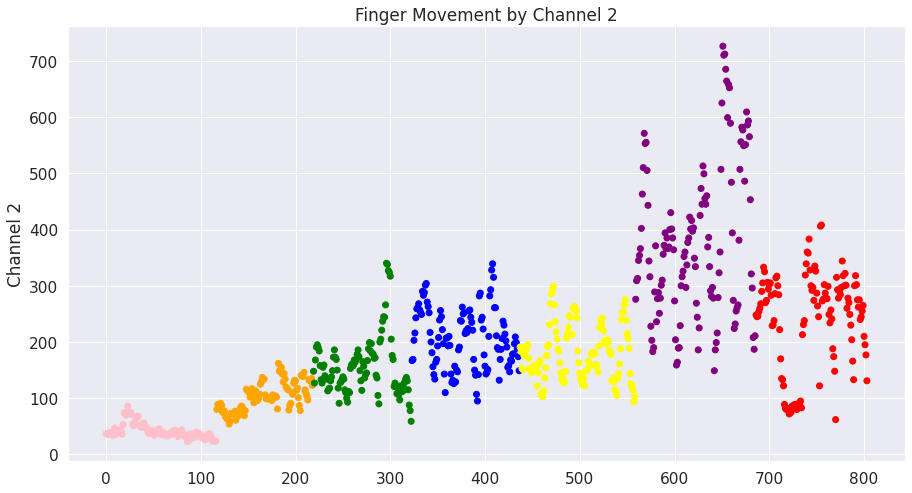

In [34]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'orange'}
ax.scatter(df.index, df['Ch2'], c=df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 2")
ax.set_ylabel("Channel 2")
plt.show()

No handles with labels found to put in legend.


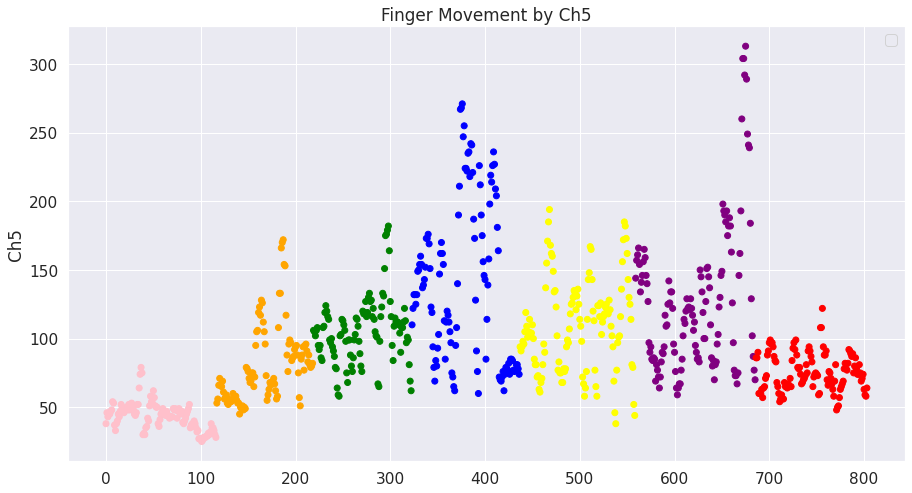

In [35]:
ch = 5
channel = "Ch" + str(ch)
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'orange'}
ax.scatter(df.index, df[channel], c=df['Finger'].map(colors))
ax.legend()
ax.set_title("Finger Movement by " + channel)
ax.set_ylabel(channel)
plt.show()